# 时间序列

时间序列数据是许多不同领域的结构化数据的重要形式，例如金融，经济学，生态学，神经科学和物理学。在许多时间点上观察或测量的任何东西都会形成一个时间序列。许多时间序列是固定频率的，也就是说，数据点根据某些规则以固定的间隔出现，例如每15秒，每5分钟或每月一次。时间序列也可以是不规则的，没有固定的时间单位或单位之间的偏移。如何标记和引用时间序列数据取决于应用程序，并且您可能具有以下之一：

- 时间戳记，特定时间点
- 固定时间段，例如2007年1月或2010年全年
- 时间间隔，以开始和结束时间戳记表示。句点可以被视为间隔的特殊情况
- 实验或经过的时间；每个时间戳是相对于特定开始时间的时间度量（例如，自放入烤箱以来每秒烘烤的曲奇的直径）

在本章中，我主要关注前三类中的时间序列，尽管许多技术都可以应用于实验时间序列，其中索引可以是整数或浮点数，指示从实验开始经过的时间。最简单和使用最广泛的时间序列是通过时间戳索引的时间序列。

> pandas还支持基于时间增量的索引，这可能是表示实验或经过时间的有用方式。 我们不会在本书中探讨timedelta索引，但是您可以在pandas文档中了解更多信息。

熊猫提供了许多内置的时间序列工具和数据算法。您可以有效地处理非常大的时间序列，并轻松地对不规则和固定频率的时间序列进行切片和切块，聚合以及重新采样。其中一些工具对于金融和经济应用程序特别有用，但是您当然也可以使用它们来分析服务器日志数据。

## 11.1 日期和时间数据类型和工具

Python标准库包括日期和时间数据的数据类型，以及与日历相关的功能。日期时间，时间和日历模块是开始的主要位置。datetime.datetime类型，或简称为datetime，被广泛使用：

In [1]:
from datetime import datetime

now = datetime.now()

now

datetime.datetime(2020, 7, 15, 22, 11, 47, 738938)

In [2]:
now.year, now.month, now.day

(2020, 7, 15)

datetime将日期和时间都存储到微秒。timedelta表示两个日期时间对象之间的时间差：

In [3]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)

delta

datetime.timedelta(days=926, seconds=56700)

In [4]:
delta.days

926

In [5]:
delta.seconds

56700

您可以向日期时间对象添加（或减去）一个时间增量或多个时间增量，以产生一个新的移位对象：

In [6]:
from datetime import timedelta

In [7]:
start = datetime(2011, 1, 7)

In [8]:
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [9]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

表11-1总结了datetime模块中的数据类型。尽管本章主要关注熊猫中的数据类型和更高级的时间序列操作，但您可能在Python的许多其他地方遇到了基于日期时间的类型。

### 在字符串和日期时间之间转换

您可以使用str或strftime方法格式化日期时间对象和pandas时间戳对象（稍后将介绍）为字符串，并传递格式说明：

In [10]:
stamp = datetime(2011, 1, 3)

In [11]:
str(stamp)

'2011-01-03 00:00:00'

In [12]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

有关格式代码的完整列表，请参见表11-2（从第2章中摘录）。

您可以使用以下相同的格式代码使用datetime.strptime将字符串转换为日期：

In [13]:
value = '2011-01-03'

In [14]:
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [15]:
datestrs = ['7/6/2011', '8/6/2011']

In [16]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

datetime.strptime是解析已知格式的日期的好方法。但是，每次都要编写格式规范可能会有些烦人，尤其是对于常见的日期格式。在这种情况下，您可以在第三方dateutil包中使用parser.parse方法（在安装熊猫时会自动安装该方法）：

In [17]:
from dateutil.parser import parse

In [18]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

dateutil能够解析大多数人类难以理解的日期表示形式：

In [19]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

在国际语言环境中，出现在月份之前的日期很常见，因此您可以通过dayfirst = True来表明这一点：

In [20]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

pandas通常面向使用日期数组，无论是用作轴索引还是用作DataFrame中的列。to_datetime方法解析许多不同类型的日期表示形式。可以快速解析ISO 8601之类的标准日期格式：

In [21]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

In [22]:
import pandas as pd

pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

它还处理应视为缺失的值（无，空字符串等）：

In [23]:
idx = pd.to_datetime(datestrs + [None])

In [24]:
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [25]:
idx[2]

NaT

In [26]:
pd.isnull(idx)

array([False, False,  True])

NaT（不是时间）是时间戳数据的熊猫的null值。

> 警告：dateutil.parser是有用但不完善的工具。值得注意的是，它会将某些字符串识别为您可能不希望使用的日期，例如，“ 42”将被解析为具有今天日历日期的2042年。

datetime对象还具有许多其他国家或地区的语言的特定于区域设置的格式选项。例如，与英语系统相比，德语或法语系统上的缩写月份名称将有所不同。有关列表，请参见表11-3。

## 11.2 时间序列基础

pandas中一种基本的时间序列对象是一个以时间戳为索引的序列，该序列通常在pandas外部以Python字符串或日期时间对象表示：

In [27]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [28]:
import numpy as np

ts = pd.Series(np.random.randn(6), index=dates)

In [29]:
ts

2011-01-02   -0.660864
2011-01-05   -0.892516
2011-01-07   -0.261048
2011-01-08    0.394434
2011-01-10    0.140635
2011-01-12    0.720481
dtype: float64

在后台，这些datetime对象已放入DatetimeIndex中：

In [30]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

与其他系列一样，索引不同的时间序列之间的算术运算会自动与日期对齐：

In [31]:
ts + ts[::2]

2011-01-02   -1.321728
2011-01-05         NaN
2011-01-07   -0.522096
2011-01-08         NaN
2011-01-10    0.281271
2011-01-12         NaN
dtype: float64

回想一下ts[:: 2]选择ts中的第二个元素。

大熊猫使用NumPy的datetime64数据类型以十亿分之一秒的分辨率存储时间戳：

In [32]:
ts.index.dtype

dtype('<M8[ns]')

DatetimeIndex中的标量值是pandas Timestamp对象：

In [33]:
stamp = ts.index[0]

In [34]:
stamp

Timestamp('2011-01-02 00:00:00')

可以在使用datetime对象的任何地方替换时间戳。此外，它可以存储频率信息（如果有）并了解如何进行时区转换和其他类型的操作。稍后将进一步讨论这两个方面。

### 索引，选择，子集

当您基于标签索引和选择数据时，时间序列的行为与任何其他pandas.Series一样。

In [35]:
stamp = ts.index[2]

In [36]:
ts[stamp]

-0.2610479931069228

为方便起见，您还可以传递可解释为日期的字符串：

In [37]:
ts['1/10/2011']

0.14063546468165292

In [38]:
ts['20110110']

0.14063546468165292

对于更长的时间序列，可以传递一年或仅一年零一个月来轻松选择数据切片：

In [39]:
longer_ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))

In [40]:
longer_ts

2000-01-01   -0.006326
2000-01-02    0.552131
2000-01-03    1.406631
2000-01-04    1.028800
2000-01-05   -1.031235
                ...   
2002-09-22    2.625855
2002-09-23    0.285741
2002-09-24   -1.965145
2002-09-25   -1.784176
2002-09-26   -1.250172
Freq: D, Length: 1000, dtype: float64

In [41]:
longer_ts['2001']

2001-01-01    0.476914
2001-01-02   -0.753122
2001-01-03    0.924799
2001-01-04   -2.727020
2001-01-05    0.802804
                ...   
2001-12-27    0.037122
2001-12-28    0.335198
2001-12-29    1.301071
2001-12-30    0.085082
2001-12-31   -1.231003
Freq: D, Length: 365, dtype: float64

在这里，字符串“ 2001”被解释为年份，并选择该时间段。如果您指定月份，这也可以使用：

In [42]:
longer_ts['2001-05']

2001-05-01   -0.997129
2001-05-02   -1.842631
2001-05-03    0.423358
2001-05-04    0.994099
2001-05-05    0.601493
2001-05-06    0.789656
2001-05-07   -0.574008
2001-05-08   -0.069458
2001-05-09   -0.042415
2001-05-10   -0.908153
2001-05-11   -0.338875
2001-05-12    2.214150
2001-05-13    0.272227
2001-05-14   -0.197819
2001-05-15    0.619748
2001-05-16    0.066555
2001-05-17   -0.440852
2001-05-18   -0.555304
2001-05-19    1.694570
2001-05-20   -0.912564
2001-05-21   -0.707604
2001-05-22    1.061711
2001-05-23    1.157975
2001-05-24   -0.898889
2001-05-25    1.220020
2001-05-26   -0.092083
2001-05-27   -0.125201
2001-05-28    0.981446
2001-05-29    0.993833
2001-05-30   -0.722777
2001-05-31   -0.301047
Freq: D, dtype: float64

用datetime对象切片也可以：

In [43]:
ts[datetime(2011, 1, 7)]

-0.2610479931069228

由于大多数时间序列数据都是按时间顺序排列的，因此可以使用时间序列中未包含的时间戳进行切片以执行范围查询：

In [44]:
ts

2011-01-02   -0.660864
2011-01-05   -0.892516
2011-01-07   -0.261048
2011-01-08    0.394434
2011-01-10    0.140635
2011-01-12    0.720481
dtype: float64

In [45]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.261048
2011-01-08    0.394434
2011-01-10    0.140635
dtype: float64

和以前一样，您可以传递字符串日期，日期时间或时间戳。请记住，以这种方式进行切片会像切片NumPy数组一样在源时间序列上产生视图。这意味着不会复制任何数据，并且片上的修改将反映在原始数据中。

有一个等效的实例方法truncate，它在两个日期之间切片一个Series：

In [46]:
ts.truncate(after='1/9/2011')

2011-01-02   -0.660864
2011-01-05   -0.892516
2011-01-07   -0.261048
2011-01-08    0.394434
dtype: float64

所有这些对于DataFrame同样适用，在其行上建立索引：

In [47]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')

In [48]:
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [49]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.315126,-1.785623,0.256569,0.061982
2001-05-09,1.038342,-0.887821,1.051129,-0.350965
2001-05-16,0.877792,-0.180605,1.490712,-1.342175
2001-05-23,-0.230326,0.025445,1.239237,0.434418
2001-05-30,-0.249859,-1.176816,-0.777604,-1.397981


### 具有重复索引的时间序列

在某些应用程序中，可能会有多个数据观测值落在特定的时间戳上。这是一个例子：

In [50]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])

In [51]:
dup_ts = pd.Series(np.arange(5), index=dates)

In [52]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

我们可以通过检查其is_unique属性来判断索引不是唯一的：

In [53]:
dup_ts.index.is_unique

False

现在，根据是否复制时间戳，索引到该时间序列将产生标量值或分片：

In [54]:
dup_ts['1/3/2000']

4

In [55]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

假设您要聚合具有非唯一时间戳的数据。一种方法是使用groupby并通过level = 0：

In [56]:
grouped = dup_ts.groupby(level=0)

In [57]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int64

In [58]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## 11.3 日期范围，频率和移位

pandas的一般时间序列被认为是不规则的；也就是说，它们没有固定的频率。对于许多应用来说，这已经足够了。但是，通常最好相对于固定频率（例如每天，每月或每15分钟）进行工作，即使这意味着在时间序列中引入缺失值。幸运的是，pandas拥有一套完整的标准时间序列频率以及用于重新采样，推断频率并生成固定频率日期范围的工具。例如，您可以通过调用resample将采样时间序列转换为固定的每日频率：

In [59]:
ts

2011-01-02   -0.660864
2011-01-05   -0.892516
2011-01-07   -0.261048
2011-01-08    0.394434
2011-01-10    0.140635
2011-01-12    0.720481
dtype: float64

In [60]:
resampler = ts.resample('D')

字符串“ D”被解释为每日频率。

频率之间的转换或重采样是一个足够大的主题，稍后可以在其自己的部分中找到（第348页的第11.6节“重采样和频率转换”）。在这里，我将向您展示如何使用基本频率及其倍数。

### 生成日期范围

虽然我以前没有解释就使用了它，但pandas.date_range负责根据特定频率生成具有指定长度的DatetimeIndex：

In [62]:
index = pd.date_range('2012-04-01', '2012-06-01')

In [63]:
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

默认情况下，date_range生成每日时间戳记。如果仅传递开始日期或结束日期，则必须传递多个期间才能生成：

In [64]:
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [65]:
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

开始日期和结束日期为生成的日期索引定义了严格的边界。例如，如果您想要一个包含每个月最后一个工作日的日期索引，则可以传递“ BM”频率（一个月的营业时间；在表11-4中查看频率的更完整列表），并且仅在或 日期间隔内将包括：

In [66]:
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

默认情况下，date_range保留开始或结束时间戳记的时间（如果有）：

In [67]:
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

有时，您将具有带有时间信息的开始或结束日期，但希望生成一组标准化为午夜的时间戳作为惯例。为此，有一个规范化选项：

In [68]:
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### 频率和日期偏移

熊猫的频率由基本频率和乘数组成。基本频率通常由字符串别名表示，例如“ M”代表每月，“ H”代表每小时。对于每个基本频率，有一个对象通常被定义为日期偏移量。例如，小时频率可以用Hour类表示：

In [69]:
from pandas.tseries.offsets import Hour, Minute

In [70]:
hour = Hour()

In [71]:
hour

<Hour>

您可以通过传递整数来定义偏移量的倍数：

In [72]:
four_hours = Hour(4)

In [73]:
four_hours

<4 * Hours>

在大多数应用程序中，您将不需要显式创建这些对象之一，而只需使用字符串别名（例如“ H”或“ 4H”）即可。 在基频之前放置一个整数会创建一个倍数：

In [77]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

许多偏移量可以通过加在一起组合在一起：

In [78]:
Hour(2) + Minute(30)

<150 * Minutes>

同样，您可以传递频率字符串，例如“ 1h30min”，这些字符串将有效地解析为相同的表达式：

In [79]:
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

某些频率描述的时间点间隔不均匀。例如，“ M”（日历的月末）和“ BM”（月的最后一个工作日/工作日）取决于一个月中的天数，在后者的情况下，则取决于该月是否在周末结束。我们称这些为锚定偏移量。

返回表11-4，以获取熊猫中可用的频率代码和日期偏移量类别的列表。

用户可以定义自己的自定义频率类别，以提供大熊猫无法使用的日期逻辑，尽管其详细信息不在本书的讨论范围之内。

#### 一个月中的第几周

从WOM开始，一种有用的频率类别是“每月的一周”。 这样一来，您便可以获取每个月的第三个星期五等日期：

In [80]:
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [82]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### 移位（超前和滞后）数据

“移位”是指在时间上前后移动数据。Series和DataFrame都有一个shift方法，用于向前或向后进行幼稚的移位，而索引保持不变：

In [83]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))

In [84]:
ts

2000-01-31   -0.430259
2000-02-29   -0.331127
2000-03-31   -0.407736
2000-04-30    0.506452
Freq: M, dtype: float64

In [85]:
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.430259
2000-04-30   -0.331127
Freq: M, dtype: float64

In [86]:
ts.shift(-2)

2000-01-31   -0.407736
2000-02-29    0.506452
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

当我们这样移动时，缺少的数据会在时间序列的开始或结尾处引入。

移位的常见用法是将一个时间序列或多个时间序列的变化百分比作为DataFrame列计算。 表示为：

In [87]:
ts / ts.shift(1) - 1

2000-01-31         NaN
2000-02-29   -0.230400
2000-03-31    0.231358
2000-04-30   -2.242108
Freq: M, dtype: float64

由于天真的变化会使索引保持不变，因此会丢弃某些数据。 因此，如果频率是已知的，则可以传递它以进行移位而不是简单地将数据提前到时间戳：

In [88]:
ts.shift(2, freq='M')

2000-03-31   -0.430259
2000-04-30   -0.331127
2000-05-31   -0.407736
2000-06-30    0.506452
Freq: M, dtype: float64

也可以传递其他频率，为您提供领先和滞后数据的灵活性：

In [89]:
ts.shift(3, freq='D')

2000-02-03   -0.430259
2000-03-03   -0.331127
2000-04-03   -0.407736
2000-05-03    0.506452
dtype: float64

In [90]:
ts.shift(1, freq='90T')

2000-01-31 01:30:00   -0.430259
2000-02-29 01:30:00   -0.331127
2000-03-31 01:30:00   -0.407736
2000-04-30 01:30:00    0.506452
Freq: M, dtype: float64

#### 偏移日期

大熊猫的日期偏移量也可以与datetime或Timestamp对象一起使用：

In [91]:
from pandas.tseries.offsets import Day, MonthEnd

In [92]:
now = datetime(2011, 11, 17)

In [93]:
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

如果添加锚定的偏移量（如MonthEnd），则第一个增量将根据频率规则将日期“前滚”至下一个日期：

In [94]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [95]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

锚定的偏移量可以分别通过分别使用前滚和后滚方法显式地“向前”滚动日期或向后滚动：

In [96]:
offset = MonthEnd()

In [97]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [98]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

创造性地使用日期偏移量是将这些方法与groupby一起使用：

In [99]:
ts = pd.Series(np.random.randn(20), index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [100]:
ts

2000-01-15   -1.405584
2000-01-19    0.687700
2000-01-23   -0.518135
2000-01-27   -0.466886
2000-01-31   -0.314746
2000-02-04   -0.859740
2000-02-08    0.255674
2000-02-12   -1.050324
2000-02-16   -0.033687
2000-02-20    1.978054
2000-02-24   -0.632769
2000-02-28   -1.482840
2000-03-03   -0.671477
2000-03-07    1.362919
2000-03-11   -0.191519
2000-03-15   -0.883145
2000-03-19   -0.804877
2000-03-23   -1.190349
2000-03-27   -0.236337
2000-03-31    0.087582
Freq: 4D, dtype: float64

In [101]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.403530
2000-02-29   -0.260804
2000-03-31   -0.315900
dtype: float64

当然，一种更简便，更快速的方法是使用重采样（我们将在第348页的第11.6节“重采样和频率转换”中对此进行更深入的讨论）：

In [102]:
ts.resample('M').mean()

2000-01-31   -0.403530
2000-02-29   -0.260804
2000-03-31   -0.315900
Freq: M, dtype: float64

## 11.4 时区处理

通常，使用时区被认为是时间序列操作中最不愉快的部分之一。结果，许多时间序列用户选择使用协调世界时或UTC的时间序列，这是格林威治标准时间的后继者，并且是当前的国际标准。时区表示为与UTC的偏移量；例如，在夏令时期间，纽约比世界协调时间晚四个小时，而在一年中的其他时间则落后五个小时。

在Python中，时区信息来自第三方pytz库（可通过pip或conda安装），该库公开了世界时区信息的汇编Olson数据库。这对于历史数据尤为重要，因为夏令时（DST）转换日期（甚至UTC偏移）已根据地方政府的异想而过多次更改。在美国，自1900年以来，DST转换时间已多次更改！

有关pytz库的详细信息，您需要查看该库的文档。就本书而言，pandas包装了pytz的功能，因此您可以在时区名称之外忽略其API。时区名称可以在文档中以交互方式找到：

In [104]:
import pytz

pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

要从pytz获取时区对象，请使用pytz.timezone：

In [109]:
tz = pytz.timezone('America/New_York')

tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

熊猫中的方法将接受时区名称或这些对象。

### 时区本地化和转换

默认情况下，熊猫中的时间序列是时区幼稚的。 例如，考虑以下时间序列：

In [114]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')

In [116]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [117]:
ts

2012-03-09 09:30:00   -0.120738
2012-03-10 09:30:00   -0.653282
2012-03-11 09:30:00    0.465504
2012-03-12 09:30:00    0.788703
2012-03-13 09:30:00   -2.239855
2012-03-14 09:30:00   -1.638225
Freq: D, dtype: float64

索引的tz字段为None：

In [119]:
print(ts.index.tz)

None


可以设置时区来生成日期范围：

In [121]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

从朴素到本地化的转换由tz_localize方法处理：

In [123]:
ts

2012-03-09 09:30:00   -0.120738
2012-03-10 09:30:00   -0.653282
2012-03-11 09:30:00    0.465504
2012-03-12 09:30:00    0.788703
2012-03-13 09:30:00   -2.239855
2012-03-14 09:30:00   -1.638225
Freq: D, dtype: float64

In [124]:
ts_utc = ts.tz_localize('America/New_York')

In [125]:
ts_utc

2012-03-09 09:30:00-05:00   -0.120738
2012-03-10 09:30:00-05:00   -0.653282
2012-03-11 09:30:00-04:00    0.465504
2012-03-12 09:30:00-04:00    0.788703
2012-03-13 09:30:00-04:00   -2.239855
2012-03-14 09:30:00-04:00   -1.638225
Freq: D, dtype: float64

对于前面的时间序列，它跨越了America / New_York时区的DST转换，我们可以本地化为EST并转换为UTC或柏林时间：

In [126]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

2012-03-09 14:30:00+00:00   -0.120738
2012-03-10 14:30:00+00:00   -0.653282
2012-03-11 13:30:00+00:00    0.465504
2012-03-12 13:30:00+00:00    0.788703
2012-03-13 13:30:00+00:00   -2.239855
2012-03-14 13:30:00+00:00   -1.638225
Freq: D, dtype: float64

In [127]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -0.120738
2012-03-10 15:30:00+01:00   -0.653282
2012-03-11 14:30:00+01:00    0.465504
2012-03-12 14:30:00+01:00    0.788703
2012-03-13 14:30:00+01:00   -2.239855
2012-03-14 14:30:00+01:00   -1.638225
Freq: D, dtype: float64

tz_localize和tz_convert也是DatetimeIndex的实例方法：

In [128]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

> 警告：本地化朴素的时间戳还将检查夏时制时间转换周围是否存在模棱两可或不存在的时间。

### 使用时区感知时间戳对象的操作

与时间序列和日期范围类似，可以将单个Timestamp对象类似地从原始位置本地化到时区，并将其从一个时区转换为另一个时区：

In [129]:
stamp = pd.Timestamp('2011-03-12 04:00')

In [130]:
stamp_utc = stamp.tz_localize('utc')

In [134]:
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

您还可以在创建时间戳时传递时区：

In [135]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')

In [136]:
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

自Unix时代（1970年1月1日）以来，可识别时区的Timestamp对象在内部存储UTC时间戳值（以纳秒为单位）。此UTC值在时区转换之间是不变的：

In [137]:
stamp_utc.value

1299902400000000000

In [139]:
stamp_utc.tz_convert('America/New_York').value

1299902400000000000

当使用熊猫的DateOffset对象执行时间算术运算时，熊猫会尽可能考虑夏令时的转换。在这里，我们构造在DST转换（向前和向后）之前发生的时间戳。首先，在转换为DST之前30分钟：

In [142]:
from pandas.tseries.offsets import Hour

In [143]:
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')

In [144]:
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [145]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

然后，在退出DST之前90分钟：

In [146]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')

In [147]:
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [148]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### 不同时区之间的操作

如果将两个具有不同时区的时间序列组合在一起，则结果将是UTC。由于时间戳记以UTC形式存储在幕后，因此这是一种简单的操作，不需要进行任何转换：

In [149]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')

In [151]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [152]:
ts

2012-03-07 09:30:00   -0.765489
2012-03-08 09:30:00   -1.769964
2012-03-09 09:30:00    1.078446
2012-03-12 09:30:00    0.200598
2012-03-13 09:30:00    0.158352
2012-03-14 09:30:00   -0.198946
2012-03-15 09:30:00   -0.817841
2012-03-16 09:30:00   -1.471774
2012-03-19 09:30:00    0.816290
2012-03-20 09:30:00    1.935733
Freq: B, dtype: float64

In [153]:
ts1 = ts[:7].tz_localize('Europe/London')

In [156]:
ts2 = ts1[2:].tz_convert('Europe/Moscow')

In [159]:
result = ts1 + ts2

In [160]:
result

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00    2.156893
2012-03-12 09:30:00+00:00    0.401197
2012-03-13 09:30:00+00:00    0.316704
2012-03-14 09:30:00+00:00   -0.397893
2012-03-15 09:30:00+00:00   -1.635682
Freq: B, dtype: float64

In [161]:
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

## 11.5 期间和期间算术

期间代表时间跨度，例如天，月，季度或年。Period类代表此数据类型，需要表11-4中的字符串或整数以及频率：

In [162]:
p = pd.Period(2007, freq='A-DEC')

In [163]:
p

Period('2007', 'A-DEC')

在这种情况下，Period对象表示从2007年1月1日到2007年12月31日（包括首尾两天）的完整时间范围。方便地，从周期中添加和减去整数会产生按其频率移动的效果：

In [164]:
p + 5

Period('2012', 'A-DEC')

In [165]:
p - 2

Period('2005', 'A-DEC')

如果两个周期的频率相同，则它们的区别在于它们之间的单位数：

In [166]:
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

可以使用period_range函数构造规则的周期范围：

In [172]:
rng = pd.period_range('2000-01-01', '2000-06-30', freq='M')

In [173]:
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]', freq='M')

PeriodIndex类存储一系列的周期，并且可以用作任何熊猫数据结构中的轴索引：

In [174]:
pd.Series(np.random.randn(6), index=rng)

2000-01    0.198605
2000-02    1.521674
2000-03   -0.709251
2000-04    1.491966
2000-05   -1.052556
2000-06    1.508510
Freq: M, dtype: float64

如果您有一个字符串数组，则还可以使用PeriodIndex类：

In [176]:
values = ['2001Q3', '2002Q2', '2003Q1']

index = pd.PeriodIndex(values, freq='Q-DEC')

index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### 周期频率转换

可以使用其asfreq方法将Periods和PeriodIndex对象转换为另一个频率。例如，假设我们有一个年度期间，并希望将其转换为在年初或年末的每月期间。 这很简单：

In [177]:
p = pd.Period('2007', freq='A-DEC')

In [178]:
p

Period('2007', 'A-DEC')

In [179]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [180]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

您可以将Period（'2007'，'A-DEC'）视为指向时间跨度的一种游标，该时间跨度按月周期细分。有关此说明，请参见图11-1。对于结束于12月以外的月份的会计年度，相应的每月子期间是不同的：

![image](images/11-5.png)

In [181]:
p = pd.Period('2007', freq='A-JUN')

In [182]:
p

Period('2007', 'A-JUN')

In [183]:
p.asfreq('M', 'start')

Period('2006-07', 'M')

In [184]:
p.asfreq('M', 'end')

Period('2007-06', 'M')

当您从高频转换为低频时，大熊猫会根据子时段“所属”的位置来确定超级时段。例如，按照A-JUN频率，2007年8月实际上是2008年期间的一部分：

In [188]:
p = pd.Period('Aug-2007', 'M')

In [196]:
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

可以使用相同的语义类似地转换整个PeriodIndex对象或时间序列：

In [197]:
rng = pd.period_range('2006', '2009', freq='A-DEC')

In [198]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [199]:
ts

2006   -0.955067
2007    1.195588
2008   -0.377835
2009    1.965553
Freq: A-DEC, dtype: float64

In [200]:
ts.asfreq('M', how='start')

2006-01   -0.955067
2007-01    1.195588
2008-01   -0.377835
2009-01    1.965553
Freq: M, dtype: float64

在此，将年度期间替换为与每个年度期间内的第一个月相对应的每月期间。相反，如果我们想要每年的最后一个工作日，则可以使用“ B”频率，并指出我们希望该期间的结束：

In [203]:
ts.asfreq('B', how='end')

2006-12-29   -0.955067
2007-12-31    1.195588
2008-12-31   -0.377835
2009-12-31    1.965553
Freq: B, dtype: float64

### 季度周期频率

季度数据是会计，财务和其他领域的标准数据。相对于一个会计年度结束，通常报告许多季度数据，通常是该年度的12个月中的最后一个日历或工作日。因此，根据会计年度结束，2012Q4期间具有不同的含义。大熊猫支持从Q-JAN到Q-DEC的所有12种可能的季度频率：

In [204]:
p = pd.Period('2012Q4', freq='Q-JAN')

In [205]:
p

Period('2012Q4', 'Q-JAN')

对于1月结束的会计年度，2012Q4从11月到1月运行，您可以将其转换为每日频率进行检查。 有关说明，请参见图11-2。

![image](images/11-5-2.png)

In [206]:
p.asfreq('D', 'start')

Period('2011-11-01', 'D')

In [207]:
p.asfreq('D', 'end')

Period('2012-01-31', 'D')

因此，可以进行简单的周期算术；例如，要获取该季度倒数第二个工作日下午4点的时间戳，您可以执行以下操作：

In [208]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [209]:
p4pm

Period('2012-01-30 16:00', 'T')

In [210]:
p4pm.to_timestamp()

Timestamp('2012-01-30 16:00:00')

您可以使用period_range生成季度范围。算术也相同：

In [211]:
rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')

In [212]:
ts = pd.Series(np.arange(len(rng)), index=rng)

In [213]:
ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int64

In [214]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60

In [215]:
ts.index = new_rng.to_timestamp()

In [216]:
ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int64

### 将时间戳转换为句点（并返回）

可以使用to_period方法将按时间戳索引的Series和DataFrame对象转换为周期：

In [217]:
rng = pd.date_range('2000-01-01', periods=3, freq='M')

In [218]:
ts = pd.Series(np.random.randn(3), index=rng)

In [219]:
ts

2000-01-31    1.452341
2000-02-29    0.552522
2000-03-31   -0.304061
Freq: M, dtype: float64

In [220]:
pts = ts.to_period()

In [221]:
pts

2000-01    1.452341
2000-02    0.552522
2000-03   -0.304061
Freq: M, dtype: float64

由于周期是指不重叠的时间跨度，因此时间戳只能属于给定频率的单个周期。虽然默认情况下会根据时间戳推断出新的PeriodIndex的频率，但您可以指定所需的任何频率。结果中有重复的句段也没有问题：

In [222]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')

In [223]:
ts2 = pd.Series(np.random.randn(6), index=rng)

In [224]:
ts2

2000-01-29   -0.730865
2000-01-30   -0.465311
2000-01-31    1.764031
2000-02-01   -0.995423
2000-02-02    2.360310
2000-02-03    0.185080
Freq: D, dtype: float64

In [226]:
ts2.to_period('M')

2000-01   -0.730865
2000-01   -0.465311
2000-01    1.764031
2000-02   -0.995423
2000-02    2.360310
2000-02    0.185080
Freq: M, dtype: float64

要转换回时间戳，请使用to_timestamp：

In [227]:
pts = ts2.to_period()

In [228]:
pts

2000-01-29   -0.730865
2000-01-30   -0.465311
2000-01-31    1.764031
2000-02-01   -0.995423
2000-02-02    2.360310
2000-02-03    0.185080
Freq: D, dtype: float64

In [230]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999   -0.730865
2000-01-30 23:59:59.999999999   -0.465311
2000-01-31 23:59:59.999999999    1.764031
2000-02-01 23:59:59.999999999   -0.995423
2000-02-02 23:59:59.999999999    2.360310
2000-02-03 23:59:59.999999999    0.185080
Freq: D, dtype: float64

### 从数组创建PeriodIndex

固定频率数据集有时会与跨多个列的时间跨度信息一起存储。例如，在此宏观经济数据集中，年份和季度位于不同的列中：

In [231]:
data = pd.read_csv('examples/macrodata.csv')

In [240]:
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [235]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [236]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
      ... 
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

通过以频率将这些数组传递给PeriodIndex，可以将它们组合以形成DataFrame的索引：

In [237]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')

In [238]:
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [241]:
data.index = index

In [242]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## 11.6 重采样和频率转换

重采样是指将时间序列从一个频率转换为另一频率的过程。将较高频率的数据聚合为较低的频率称为下采样，而将较低的频率转换为较高的频率称为上采样。并非所有的重采样都属于这两个类别。例如，将W-WED（在星期三每周一次）转换为W-FRI既不是上采样也不是下采样。

熊猫对象配备了重新采样方法，这是所有频率转换的主要功能。重采样具有与groupby类似的API；您调用resample对数据进行分组，然后调用聚合函数：

In [243]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')

In [244]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [245]:
ts

2000-01-01    3.350840
2000-01-02   -1.138032
2000-01-03    0.520650
2000-01-04   -1.023838
2000-01-05   -0.785142
                ...   
2000-04-05   -1.437069
2000-04-06    1.038737
2000-04-07    1.236756
2000-04-08   -0.296264
2000-04-09    0.955148
Freq: D, Length: 100, dtype: float64

In [246]:
ts.resample('M').mean()

2000-01-31    0.064309
2000-02-29    0.117465
2000-03-31   -0.386508
2000-04-30    0.129843
Freq: M, dtype: float64

In [247]:
ts.resample('M', kind='period').mean()

2000-01    0.064309
2000-02    0.117465
2000-03   -0.386508
2000-04    0.129843
Freq: M, dtype: float64

重采样是一种灵活的高性能方法，可用于处理非常大的时间序列。以下各节中的示例说明了其语义和用法。表11-5总结了其一些选项。

### 下采样

将数据聚合到规则的较低频率是很正常的时间序列任务。您正在汇总的数据不需要经常固定；所需的频率定义了bin边缘，这些边缘用于将时间序列切成小块进行汇总。例如，要转换为每月的“ M”或“ BM”，您需要将数据分成一个月的间隔。据说每个间隔都是半开放的。一个数据点只能属于一个时间间隔，时间间隔的并集必须组成整个时间范围。使用重采样对数据进行下采样时，需要考虑以下几点：

- 每个间隔的哪一侧关闭
- 如何用间隔的开始或结束标记每个聚合的容器

为了说明，让我们看一些一分钟的数据：

In [249]:
rng = pd.date_range('2000-01-01', periods=12, freq='T')

In [250]:
ts = pd.Series(np.arange(12), index=rng)

In [251]:
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int64

假设您想通过将每个组的总和将此数据聚合为五分钟的块或条形：

In [255]:
ts.resample('5min').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int64

您通过的频率以五分钟为增量定义垃圾箱边缘。默认情况下，左边的边沿是包含边界的，因此00:00的值包含在00:00到00:05的时间间隔中。1传递closed ='right'可以更改右边的关闭时间间隔：

In [256]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int64

产生的时间序列由每个容器左侧的时间戳标记。通过传递label ='right'，您可以使用正确的bin边缘标记它们：

In [258]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int64

有关将分钟频率数据重新采样到五分钟频率的图示，请参见图11-3。

![image](images/11-6.png)

最后，您可能希望将结果索引移动一定量，例如，从右边缘减去一秒钟，以使其更加清楚时间戳记所指的间隔。为此，将一个字符串或日期偏移量传递给loffset：

In [259]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int64

您也可以通过在没有loffset的结果上调用shift方法来实现loffset的效果。

#### 开-高-低-闭（OHLC）重采样

在金融中，汇总时间序列的一种流行方法是为每个存储区计算四个值：第一个（打开），最后一个（关闭），最大（高）和最小（低）值。通过使用ohlc聚合函数，您将获得一个包含包含这四个聚合的列的DataFrame，这些列可以在一次数据扫描中有效地进行计算：

In [260]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


### 上采样和内插

从低频转换为高频时，不需要聚合。让我们考虑一个包含每周数据的DataFrame：

In [261]:
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [262]:
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-2.244713,2.019729,0.148451,0.185990
2000-01-12,-1.287029,-0.753038,0.745041,-1.547941


当您对这些数据使用聚合函数时，每个组只有一个值，缺少值会导致间隔。我们使用asfreq方法将其转换为更高的频率，而不进行任何聚合：

In [270]:
df_daily = frame.resample('D').asfreq()

In [271]:
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-2.244713,2.019729,0.148451,0.185990
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.287029,-0.753038,0.745041,-1.547941


假设您想填写非星期三的每个每周值。fillna和reindex方法中可用的相同填充或插值方法可用于重新采样：

In [265]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-2.244713,2.019729,0.148451,0.185990
2000-01-06,-2.244713,2.019729,0.148451,0.185990
2000-01-07,-2.244713,2.019729,0.148451,0.185990
2000-01-08,-2.244713,2.019729,0.148451,0.185990
2000-01-09,-2.244713,2.019729,0.148451,0.185990
2000-01-10,-2.244713,2.019729,0.148451,0.185990
2000-01-11,-2.244713,2.019729,0.148451,0.185990
2000-01-12,-1.287029,-0.753038,0.745041,-1.547941


您可以类似地选择仅填充一定数量的向前时间段，以限制使用观察值继续走多远：

In [266]:
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-2.244713,2.019729,0.148451,0.185990
2000-01-06,-2.244713,2.019729,0.148451,0.185990
2000-01-07,-2.244713,2.019729,0.148451,0.185990
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-1.287029,-0.753038,0.745041,-1.547941


值得注意的是，新的日期索引根本不需要与旧的日期索引重叠：

In [273]:
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-2.244713,2.019729,0.148451,0.185990
2000-01-13,-1.287029,-0.753038,0.745041,-1.547941


### 定期重采样

对由周期索引的数据进行重采样与时间戳类似：

In [274]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

In [279]:
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.952407,-0.490832,-0.896245,1.137145
2000-02,-1.389205,-1.980134,-2.374350,-1.196163
2000-03,2.024545,-2.645722,-0.585517,0.612934
2000-04,-0.390156,-1.055824,0.398726,0.770448
2000-05,-0.556767,0.592712,0.415491,0.886106


In [280]:
annual_frame = frame.resample('A-DEC').mean()

In [281]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.041423,-0.440893,-0.315960,0.323637
2001,-0.226443,0.534980,-0.138711,-0.136036


上采样更加细微，因为您必须决定是否要在新频率的时间跨度的哪一端在重采样之前放置值，就像asfreq方法一样。约定参数默认为“开始”，但也可以为“结束”：

In [282]:
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.041423,-0.440893,-0.315960,0.323637
2000Q2,-0.041423,-0.440893,-0.315960,0.323637
2000Q3,-0.041423,-0.440893,-0.315960,0.323637
2000Q4,-0.041423,-0.440893,-0.315960,0.323637
2001Q1,-0.226443,0.534980,-0.138711,-0.136036
2001Q2,-0.226443,0.534980,-0.138711,-0.136036
2001Q3,-0.226443,0.534980,-0.138711,-0.136036
2001Q4,-0.226443,0.534980,-0.138711,-0.136036


In [284]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.041423,-0.440893,-0.315960,0.323637
2001Q1,-0.041423,-0.440893,-0.315960,0.323637
2001Q2,-0.041423,-0.440893,-0.315960,0.323637
2001Q3,-0.041423,-0.440893,-0.315960,0.323637
2001Q4,-0.226443,0.534980,-0.138711,-0.136036


由于时间段是指时间跨度，因此有关上采样和下采样的规则更加严格：

- 在下采样中，目标频率必须是源频率的一个子周期。
- 在上采样中，目标频率必须超过源频率。

如果不满足这些规则，将引发异常。这主要影响季度，年度和每周频率； 例如，Q-MAR定义的时间范围仅与A-MAR，A-JUN，A-SEP和A-DEC对齐：

In [286]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.041423,-0.440893,-0.315960,0.323637
2001Q1,-0.041423,-0.440893,-0.315960,0.323637
2001Q2,-0.041423,-0.440893,-0.315960,0.323637
2001Q3,-0.041423,-0.440893,-0.315960,0.323637
2001Q4,-0.226443,0.534980,-0.138711,-0.136036
2002Q1,-0.226443,0.534980,-0.138711,-0.136036
2002Q2,-0.226443,0.534980,-0.138711,-0.136036
2002Q3,-0.226443,0.534980,-0.138711,-0.136036


## 11.7 移动窗口功能

用于时间序列运算的一类重要的数组转换是统计信息和在滑动窗口上或权重呈指数衰减的其他函数。这对于平滑嘈杂或不完整的数据很有用。我称它们为移动窗口函数，即使它包含没有固定长度窗口的函数（如指数加权移动平均值）。像其他统计功能一样，这些功能也会自动排除丢失的数据。

在深入研究之前，我们可以加载一些时间序列数据并将其重新采样为工作日频率：

In [287]:
close_px_all = pd.read_csv('examples/stock_px_2.csv', parse_dates=True, index_col=0)

In [288]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]

In [289]:
close_px = close_px.resample('B').ffill()

我现在介绍滚动运算符，它的行为类似于重采样和分组。可以在Series或DataFrame以及窗口上调用它（表示为多个周期；有关创建的图，请参见图11-4）：

In [297]:
%matplotlib inline

import matplotlib.pyplot as plt

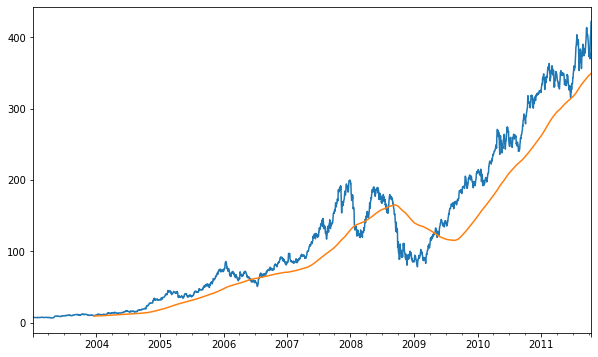

In [310]:
close_px.AAPL.plot(figsize=(10,6))
close_px.AAPL.rolling(250).mean().plot()

表达式rolling（250）在行为上与groupby类似，但是它不是分组而是创建了一个对象，该对象可以在250天的滑动窗口内进行分组。因此，这里有苹果股价的250天移动窗口均值。

默认情况下，滚动功能要求窗口中的所有值均为非NA。可以更改此行为以解决数据丢失的问题，尤其是考虑到在时间序列开始时数据窗口期少于窗口期这一事实（请参见图11-5）：

In [311]:
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()

In [314]:
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

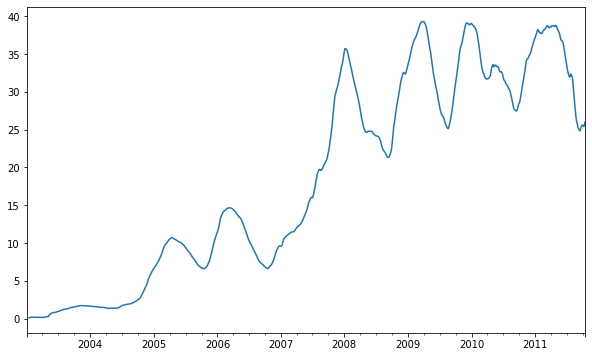

In [315]:
appl_std250.plot(figsize=(10,6))

为了计算扩展窗口均值，请使用扩展运算符而不是滚动。扩展均值从时间序列的开始处开始时间窗口，并增加窗口的大小，直到涵盖整个序列。apple_std250时间序列的均值窗口扩大如下：

In [316]:
expanding_mean = appl_std250.expanding().mean()

In [317]:
expanding_mean

2003-01-02          NaN
2003-01-03          NaN
2003-01-06          NaN
2003-01-07          NaN
2003-01-08          NaN
                ...    
2011-10-10    18.521201
2011-10-11    18.524272
2011-10-12    18.527385
2011-10-13    18.530554
2011-10-14    18.533823
Freq: B, Name: AAPL, Length: 2292, dtype: float64

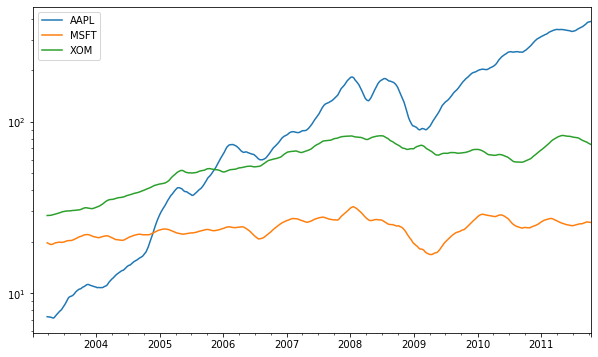

In [321]:
close_px.rolling(60).mean().plot(figsize=(10,6), logy=True)

滚动功能还接受一个字符串，该字符串指示固定大小的时间偏移，而不是设定的周期数。 对于不规则的时间序列，使用此表示法可能很有用。 这些是您可以传递以重新采样的相同字符串。例如，我们可以像这样计算20天的滚动平均值：

In [322]:
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


### 指数加权函数

将静态窗口大小与相等加权的观测值结合使用的另一种方法是，指定一个恒定的衰减因子，以赋予更多的权重给最近的观测值。有两种方法可以指定衰减因子。 一种流行的方法是使用跨度，这使得结果与窗口大小等于跨度的简单移动窗口功能相当。

由于指数加权的统计量在最近的观察结果上占有更大的比重，因此与等权重的统计量相比，它“适应”速度更快。

pandas具有ewm运算符以配合滚动和扩展。 这是一个示例，将Apple股票价格的60天移动平均线与span = 60的EW移动平均线进行了比较（见图11-7）：

In [325]:
aapl_px = close_px.AAPL['2006':'2007']

In [326]:
ma60 = aapl_px.rolling(30, min_periods=20).mean()

In [327]:
ewma60 = aapl_px.ewm(span=30).mean()

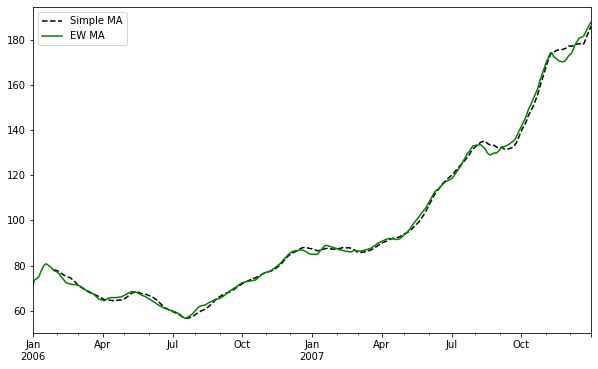

In [331]:
plt.figure(figsize=(10,6))
ma60.plot(style='k--', label='Simple MA')
ewma60.plot(style='g-', label='EW MA')
plt.legend()

### 二进制移动窗口功能

一些统计运算符，例如相关性和协方差，需要对两个时间序列进行运算。例如，金融分析师通常对股票与标普500等基准指数的相关性感兴趣。要查看这一点，我们首先计算所有时间序列的百分比变化：

In [332]:
spx_px = close_px_all['SPX']

In [333]:
spx_rets = spx_px.pct_change()

In [334]:
returns = close_px.pct_change()

然后，我们将滚动称为corr聚合函数，然后可以使用spx_rets计算滚动相关性（有关结果图，请参见图11-8）：

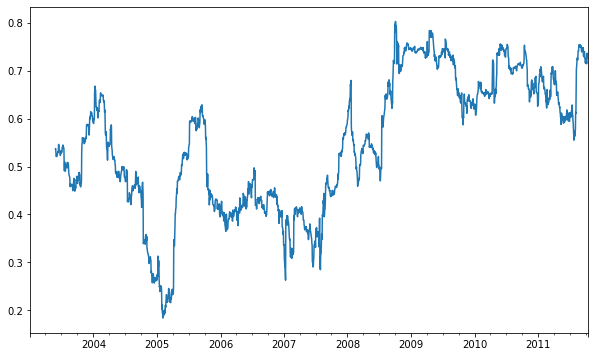

In [335]:
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot(figsize=(10,6))

假设您想一次计算标准普尔500指数与许多股票的相关性。编写循环并创建一个新的DataFrame很容易，但可能会重复，因此，如果传递Series和DataFrame，则诸如rolling_corr之类的函数将计算Series与DataFrame中每一列的相关性（在这种情况下为spx_rets）（结果图见图11-9）：

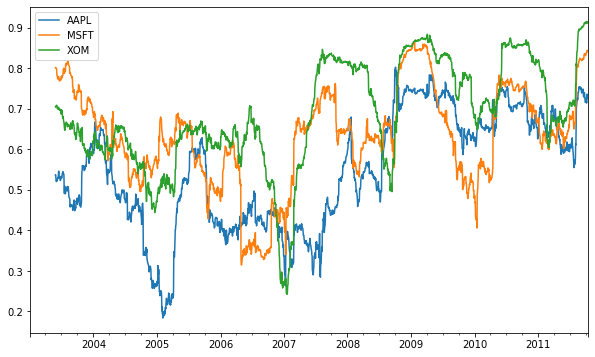

In [336]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot(figsize=(10,6))

### 用户定义的移动窗口功能

滚动的apply方法和相关方法提供了一种在移动窗口上应用自己设计的数组函数的方法。唯一的要求是该函数从数组的每一部分产生一个单一值（一个减少量）。例如，虽然我们可以使用rolling（...）。quantile（q）计算样本分位数，但我们可能会对样本中特定值的百分等级感兴趣。 scipy.stats.percentileofscore函数就是这样做的（结果图见图11-10）：

In [337]:
from scipy.stats import percentileofscore

In [338]:
score_at_2percent = lambda x: percentileofscore(x, 0.02)

In [339]:
result = returns.AAPL.rolling(250).apply(score_at_2percentpercent)

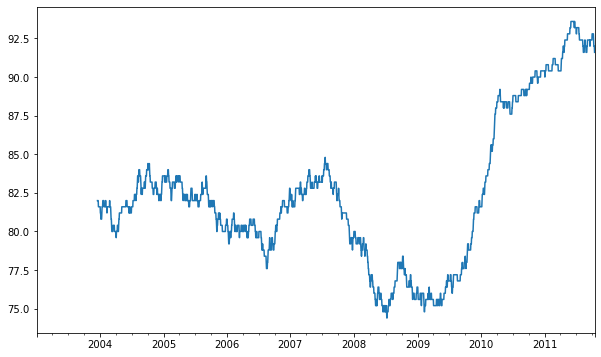

In [340]:
result.plot(figsize=(10,6))

如果尚未安装SciPy，则可以使用conda或pip进行安装。

## 11.8 结论

时间序列数据要求的分析和数据转换工具类型不同于我们在前几章中探讨的其他类型的数据。

在接下来的章节中，我们将继续介绍一些高级的熊猫方法，并展示如何开始使用诸如statsmodels和scikit-learn之类的建模库。